In [25]:
# .py 불러오기
import frontalize
import facial_feature_detector as feature_detection
import camera_calibration as calib
import check_resources as check
import image_util

import scipy.io as io
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

Number of faces detected: 1
query image shape: (300, 300, 3)


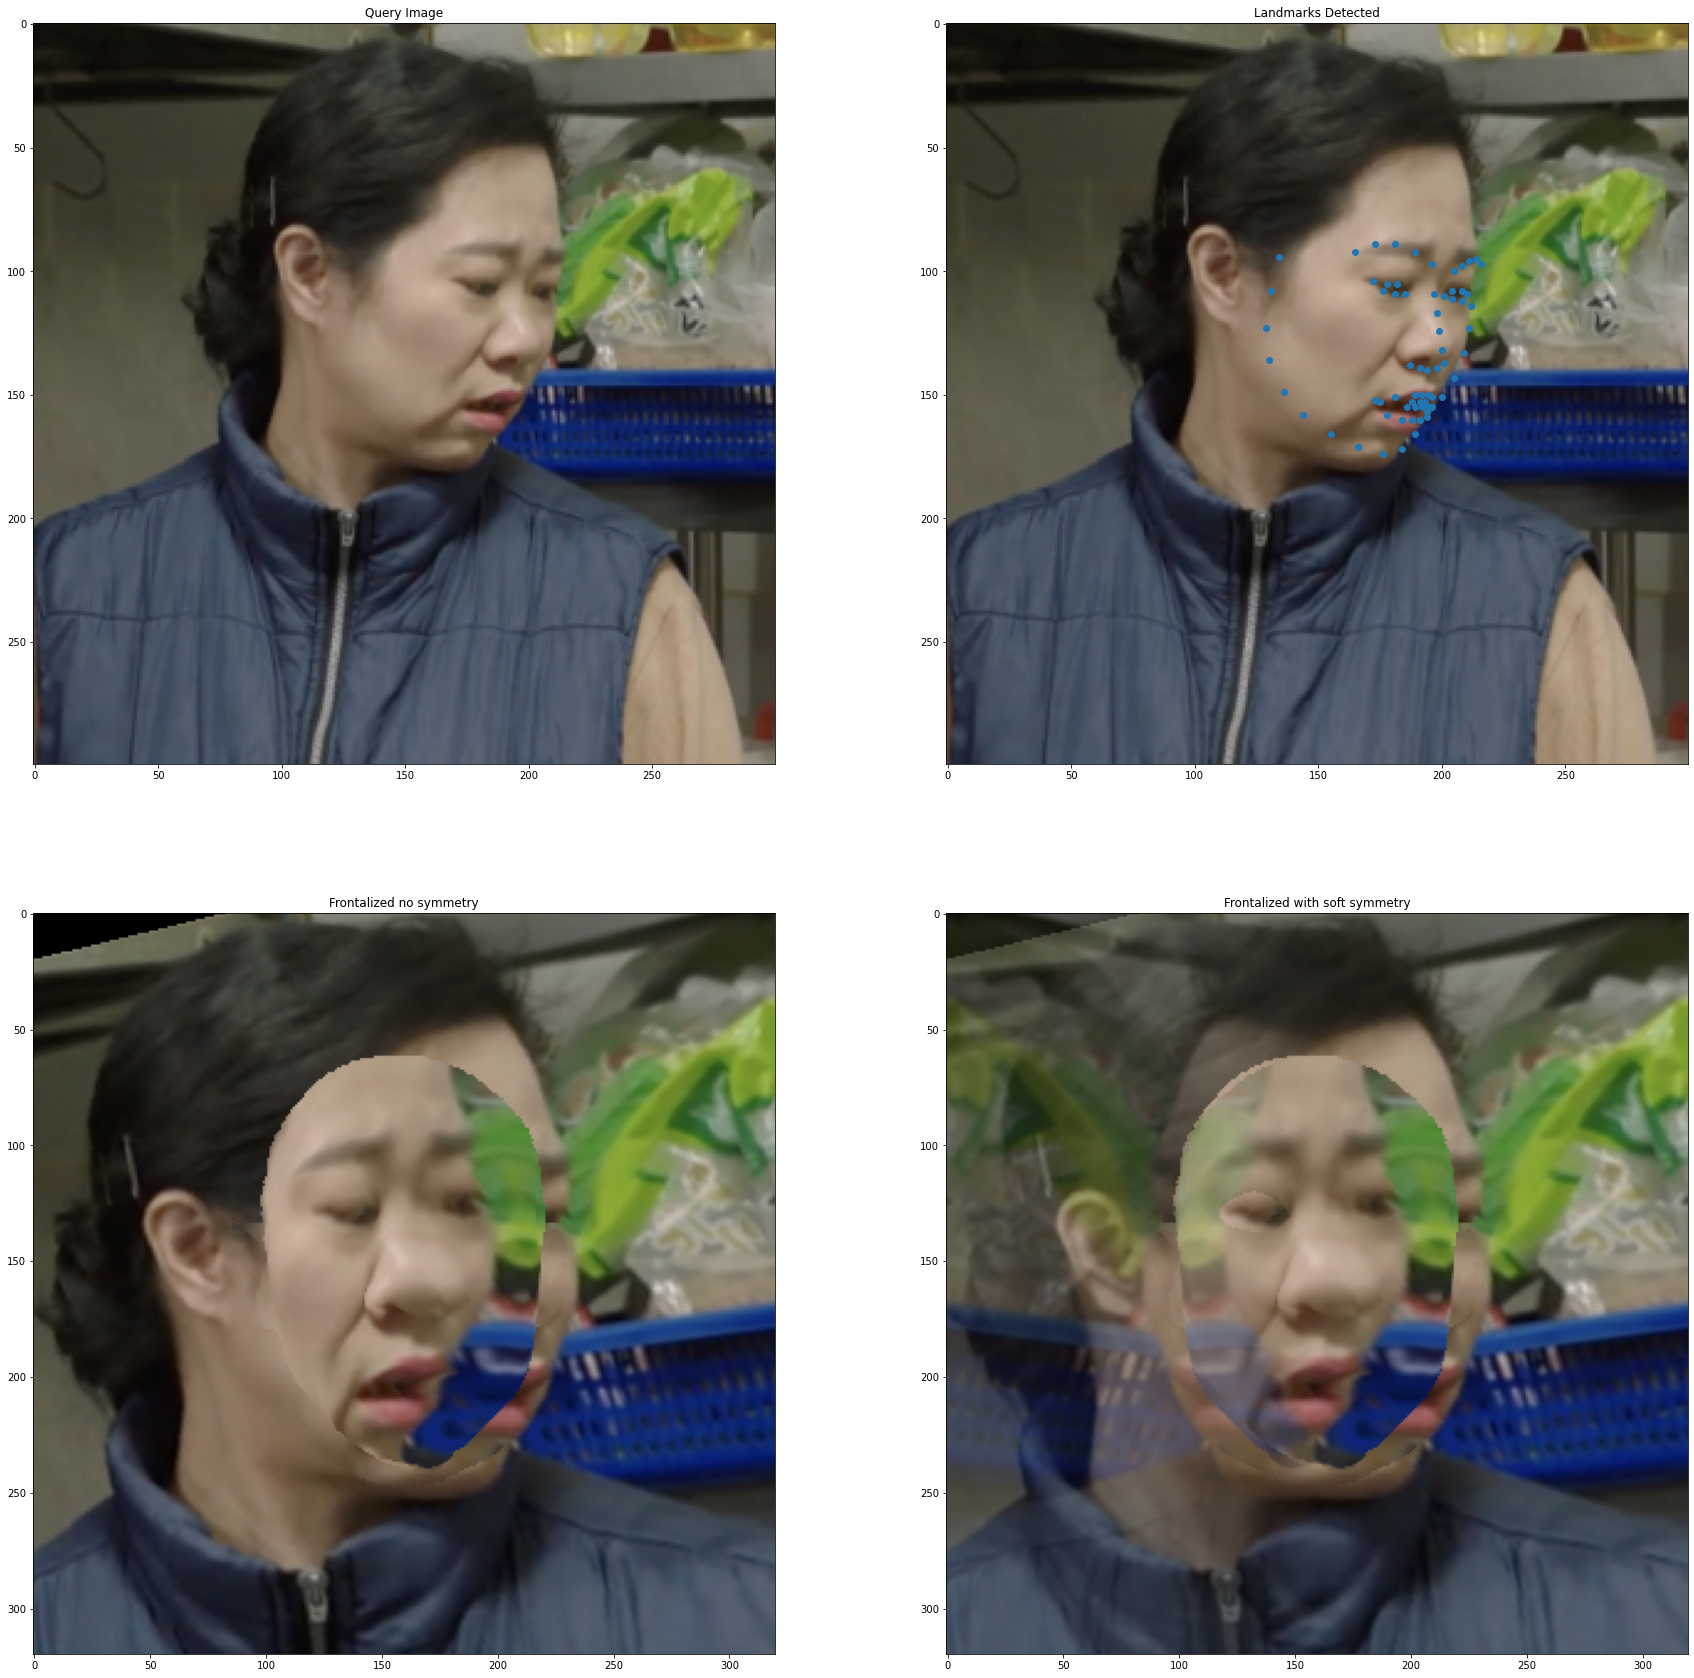

In [37]:
# 폴더 내 MATLAB 파일
model3D = frontalize.ThreeD_Model('./frontalization_models/model3Ddlib.mat', 'model_dlib')

# 이미지 불러오기
img = cv2.imread('./test2.png', 1)

# 이미지 센터링 및 리사이즈
img = image_util.center_image(img, IMAGE_SIZE=300)

plt.figure(figsize=(30, 30))

plt.subplot(2, 2, 1)
plt.title('Query Image')
plt.imshow(img[:, :, ::-1])
lmarks = feature_detection.get_landmarks(img)

plt.subplot(2, 2, 2)
plt.title('Landmarks Detected')
plt.imshow(img[:, :, ::-1])
plt.scatter(lmarks[0][:, 0], lmarks[0][:, 1])
proj_matrix, camera_matrix, rmat, tvec = calib.estimate_camera(model3D, lmarks[0])
eyemask = np.asarray(io.loadmat('frontalization_models/eyemask.mat')['eyemask'])
frontal_raw, frontal_sym = frontalize.frontalize(img, proj_matrix, model3D.ref_U, eyemask)

plt.subplot(2, 2, 3)
plt.title('Frontalized no symmetry')
plt.imshow(frontal_raw[:, :, ::-1])


### 요 이미지가 최종 결과물입니다 ###
plt.subplot(2, 2, 4)
plt.title('Frontalized with soft symmetry')
plt.imshow(frontal_sym[:, :, ::-1])
plt.show()